# Environment

# Plot ROI For my custom image

In [1]:
import sys
import torch, os, requests
from models.rcnn import RCNN
from utils import visualize as vis

# create model
model = RCNN()

# load model weights
weights_path = 'weights.pt'
if not os.path.exists(weights_path):
    r = requests.get('https://storage.googleapis.com/pd-models/RCNN_128_square_gopro.pt')  
    with open(weights_path, 'wb') as f:
        f.write(r.content)
model.load_state_dict(torch.load(weights_path, map_location='cpu'))

 


C:\Users\prajw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\prajw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\prajw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivale

<All keys matched successfully>

In [ ]:
import cv2
import torch
import torchvision.transforms.functional as TF
from PIL import Image
import matplotlib.pyplot as plt
import torchvision
from utils import transforms
import time
import torchvision.transforms as T
import numpy as np
import tkinter as tk



# roi = np.load('SingleCarView1_ROIs.npy')


video_path = "TestVideo2.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frame rate of the video
fps = cap.get(cv2.CAP_PROP_FPS)

frame_interval = int(fps / 0.25)
# Initialize a frame counter
frame_count = 0
# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error opening video file")


# Loop over the frames of the video file
while cap.isOpened():
    # Read a frame from the video file
    ret, frame = cap.read()
    # Check if the frame was read successfully
    if ret:
        # Increment the frame counter
        frame_count += 1

        # Skip frames until 5 seconds have elapsed
        # if frame_count < frame_interval:
        #     continue

        if frame_count % 2 != 0:
            continue
        # Reset the frame counter
        frame_count = 0
        
        # Convert the frame to a numpy array
        image = Image.fromarray(frame)   
        image = TF.to_tensor(image)
        image = TF.resize(image, 1000)

        roi=[[[0.197, 0.697], [0.303, 0.638], [0.443, 0.811], [0.311, 0.925]], [[0.447, 0.805], [0.528, 0.73], [0.382, 0.598], [0.307, 0.635]], [[0.388, 0.594], [0.423, 0.573], [0.591, 0.656], [0.532, 0.728]], [[0.595, 0.654], [0.636, 0.6], [0.488, 0.541], [0.426, 0.569]], [[0.249, 0.527], [0.308, 0.495], [0.244, 0.456], [0.199, 0.477]], [[0.199, 0.477], [0.15, 0.496], [0.176, 0.555], [0.249, 0.529]]]
        rois = torch.tensor(roi)

        parking_space_coordinates = rois


        # # normalize image to default torchvision values
        image = T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(image)
        class_logits = model(image, parking_space_coordinates)
        class_scores = class_logits.softmax(1)[:, 1]

        threshold = 0.5
        predicted_labels = torch.where(class_scores >= threshold, 1, 0)
        vis.plot_ds_image(image, rois, class_scores, predicted_labels)
        # # Wait for a key press to exit the loop
        if cv2.waitKey(0) & 0xFF == ord('q'):
            break
    else:
        break

# Release the resources
cap.release()
cv2.destroyAllWindows()


In [79]:
# inference
#image = torch.zeros([3, 1000, 1000])
import torchvision.transforms.functional as TF
from PIL import Image
import matplotlib.pyplot as plt
import torchvision

image_path = "zero.JPG"
image = Image.open(image_path)
image = torchvision.io.read_image(image_path)
image = TF.resize(image, 1000)
# Resize the image to the desired dimensions




In [80]:
import pickle

#roi_file_path = "rois.pkl"
#with open(roi_file_path, "rb") as f:
    #rois = pickle.load(f)
roi=[[[0.1, 0.447], [0.135, 0.479], [0.278, 0.38], [0.241, 0.356]], [[0.131, 0.479], [0.178, 0.525], [0.328, 0.409], [0.28, 0.378]], [[0.329, 0.409], [0.395, 0.445], [0.24, 0.587], [0.179, 0.523]], [[0.246, 0.586], [0.336, 0.664], [0.485, 0.491], [0.402, 0.444]], [[0.489, 0.486], [0.59, 0.533], [0.48, 0.766], [0.337, 0.663]], [[0.481, 0.766], [0.646, 0.85], [0.703, 0.586], [0.588, 0.529]], [[0.705, 0.588], [0.81, 0.633], [0.809, 0.918], [0.644, 0.851]], [[0.81, 0.915], [0.928, 0.924], [0.897, 0.667], [0.813, 0.633]], [[0.811, 0.625], [0.804, 0.53], [0.873, 0.559], [0.899, 0.669]], [[0.81, 0.625], [0.805, 0.525], [0.717, 0.482], [0.701, 0.581]], [[0.704, 0.581], [0.59, 0.525], [0.633, 0.441], [0.719, 0.482]], [[0.635, 0.445], [0.549, 0.408], [0.488, 0.49], [0.589, 0.528]], [[0.485, 0.484], [0.403, 0.436], [0.475, 0.379], [0.546, 0.408]], [[0.548, 0.407], [0.587, 0.367], [0.526, 0.335], [0.473, 0.378]], [[0.475, 0.378], [0.407, 0.356], [0.333, 0.406], [0.402, 0.433]]]
rois = torch.tensor(roi)

parking_space_coordinates = rois
print(parking_space_coordinates.shape)

torch.Size([15, 4, 2])


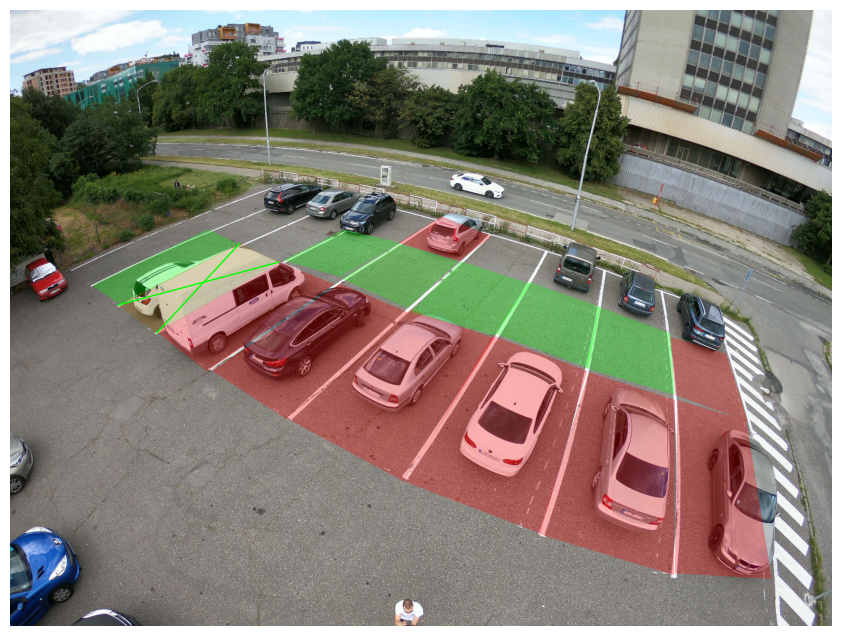

In [81]:
from utils import transforms
import torchvision.transforms as T

image = transforms.preprocess(image)

class_logits = model(image, parking_space_coordinates)
class_scores = class_logits.softmax(1)[:, 1]

threshold = 0.6
predicted_labels = torch.where(class_scores >= threshold, 1, 0)
vis.plot_ds_image(image, rois,class_scores, predicted_labels)
